# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from glob import glob
from PIL import Image

# Data Collection

``Image Data and one csv file is used in this model Metadata CSV is used to analyse the data and to map the image from the folder to add its path in the Data``

In [2]:
img = os.path.join("C:\\Users\\Manoj Kuliyal\\OneDrive\\Projects\\Skin_Cancer_Classification\\img")
data1=pd.read_csv("HAM10000_metadata.csv",encoding='utf-8')
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(img, '*', '*.jpg'))}

In [3]:
data1

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
classes={
    'akiec':'actinic keratoses and intraepithelial carcinom',
    'bcc':'basal cell carcinoma',
    'bkl':'benign keratosis-like lesions',
    'df':'dermatofibroma',
    'nv':'melanocytic nevi',
    'vasc':'pyogenic granulomas and hemorrhage',
    'mel':'melanoma'
}

Map the image and other important characteristics to the dataset

In [5]:
data1['path'] = data1['image_id'].map(imageid_path_dict.get)
data1['cell_type'] = data1['dx'].map(classes.get) 
data1['cell_type'] = pd.Categorical(data1['cell_type'])
data1['cell_type_idx'] = pd.Categorical(data1['cell_type']).codes

In [6]:
data1

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,actinic keratoses and intraepithelial carcinom,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,actinic keratoses and intraepithelial carcinom,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,actinic keratoses and intraepithelial carcinom,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,actinic keratoses and intraepithelial carcinom,0


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   lesion_id      10015 non-null  object  
 1   image_id       10015 non-null  object  
 2   dx             10015 non-null  object  
 3   dx_type        10015 non-null  object  
 4   age            9958 non-null   float64 
 5   sex            10015 non-null  object  
 6   localization   10015 non-null  object  
 7   path           10015 non-null  object  
 8   cell_type      10015 non-null  category
 9   cell_type_idx  10015 non-null  int8    
dtypes: category(1), float64(1), int8(1), object(7)
memory usage: 646.0+ KB


In [8]:
classes={
    0:('akiec','actinic keratoses and intraepithelial carcinom'),
    1:('bcc','basal cell carcinoma'),
    2:('bkl','benign keratosis-like lesions'),
    3:('df','dermatofibroma'),
    4:('nv','melanocytic nevi'),
    5:('vasc','pyogenic granulomas and hemorrhage'),
    6:('mel','melanoma')
}

In [9]:
data1['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

# Exploratory Data Analysis

C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_21604\3989187481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1['dx'], palette='bright', saturation=0.75, order=data1['dx'].value_counts().index, orient='v')


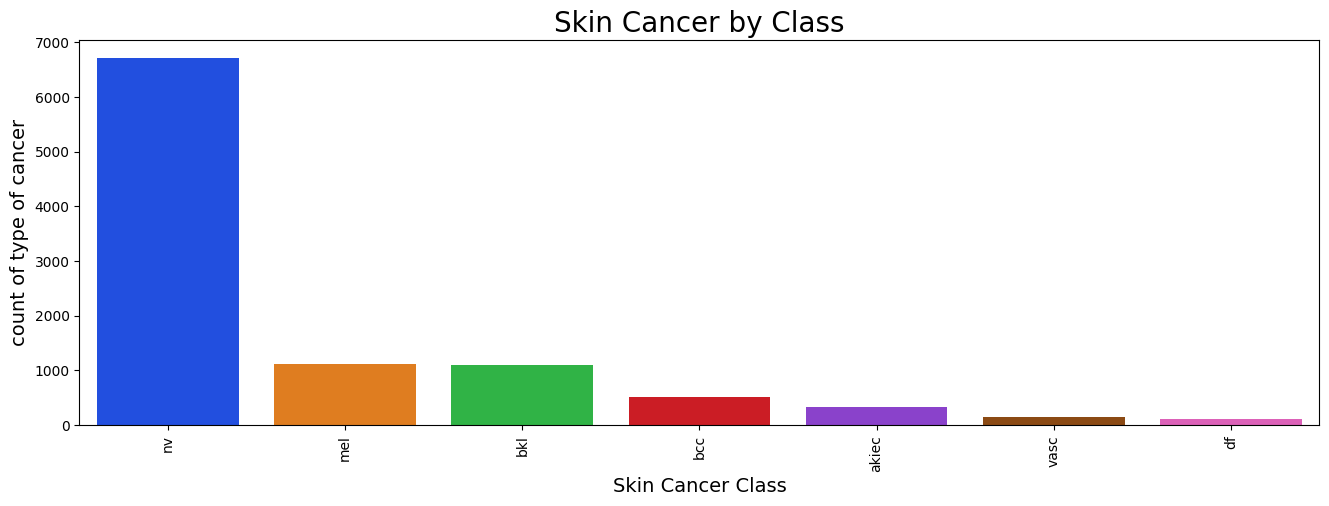

In [10]:
#Plot the Frequency of each type of Cancer by class
plt.figure(figsize=(16, 5))
sns.countplot(x=data1['dx'], palette='bright', saturation=0.75, order=data1['dx'].value_counts().index, orient='v')
plt.title('Skin Cancer by Class', fontsize=20)
plt.xlabel('Skin Cancer Class', fontsize=14)
plt.ylabel('count of type of cancer', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Above Analysis shows that nv=Melanocytic nevi is dominating class than other classes and df=dermotafibroma is the lest dominated class

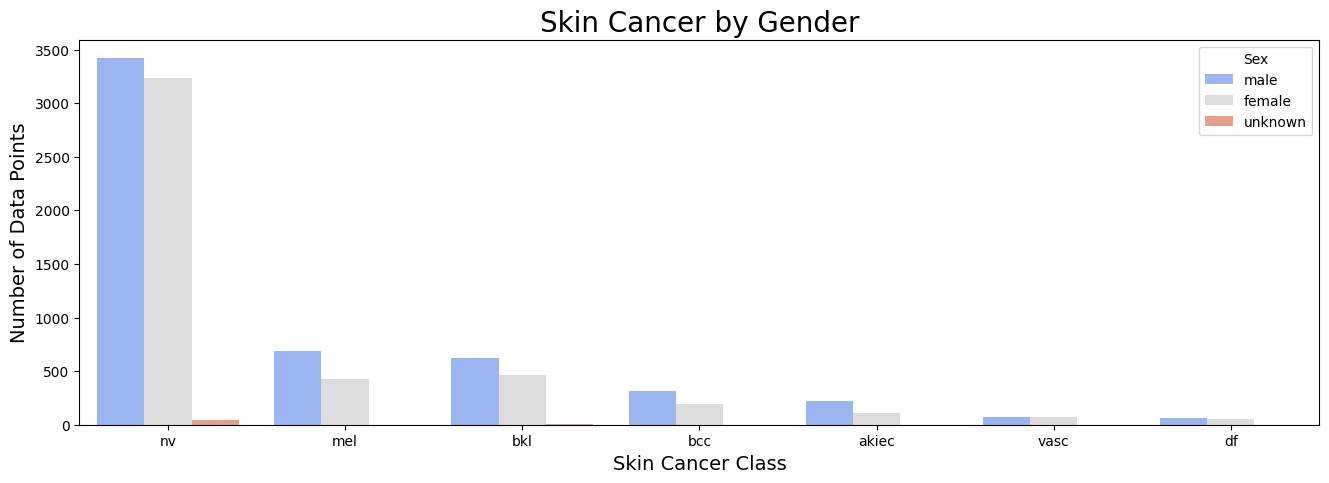

In [11]:
plt.figure(figsize=(16, 5))
sns.countplot(x=data1['dx'], hue=data1['sex'], palette='coolwarm', saturation=0.75, order=data1['dx'].value_counts().index, orient='v')
plt.title('Skin Cancer by Gender', fontsize=20)
plt.xlabel('Skin Cancer Class', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.legend(title='Sex')
plt.show()

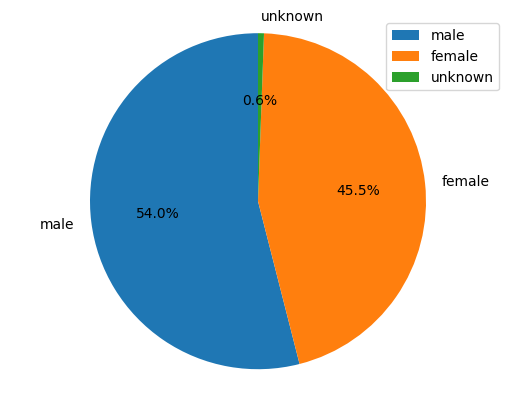

In [12]:
import matplotlib.pyplot as plt

tmp = data1['sex'].value_counts().reset_index()
tmp.columns = ['sex', 'count']

fig, ax = plt.subplots()
ax.pie(tmp['count'], labels=tmp['sex'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  
plt.legend()
plt.show()

This Pie Chart shows that Most of the male suffers from the skin Cancer As compared to The Women

C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_21604\1594716641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='dx_type',data=data1, order = data1['dx_type'].value_counts().index, palette = 'flare')


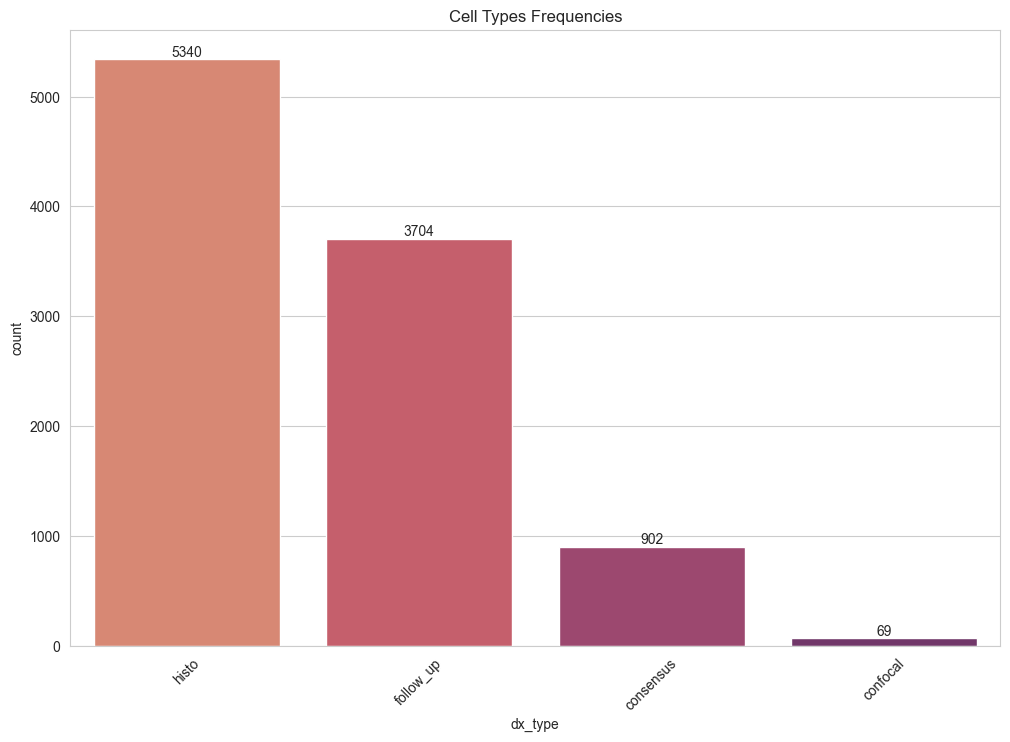

In [13]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type',data=data1, order = data1['dx_type'].value_counts().index, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

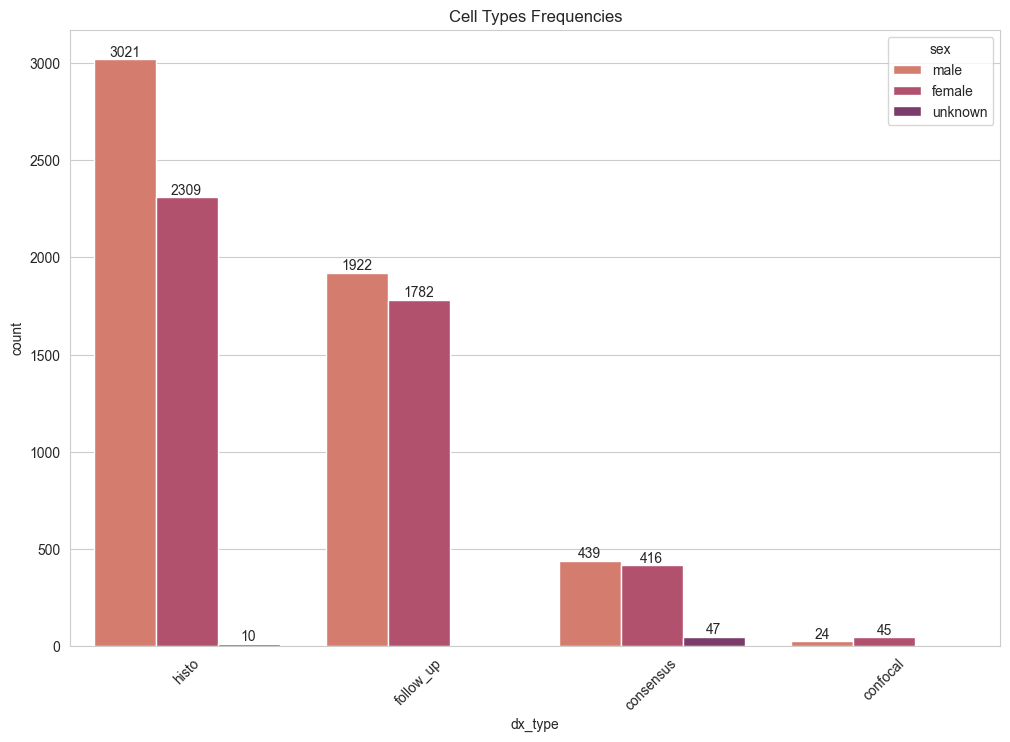

In [14]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type',hue='sex', data=data1, order = data1['dx_type'].value_counts().index, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_21604\3700738833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='localization',data=data1, order = data1['localization'].value_counts().index, palette = 'crest')


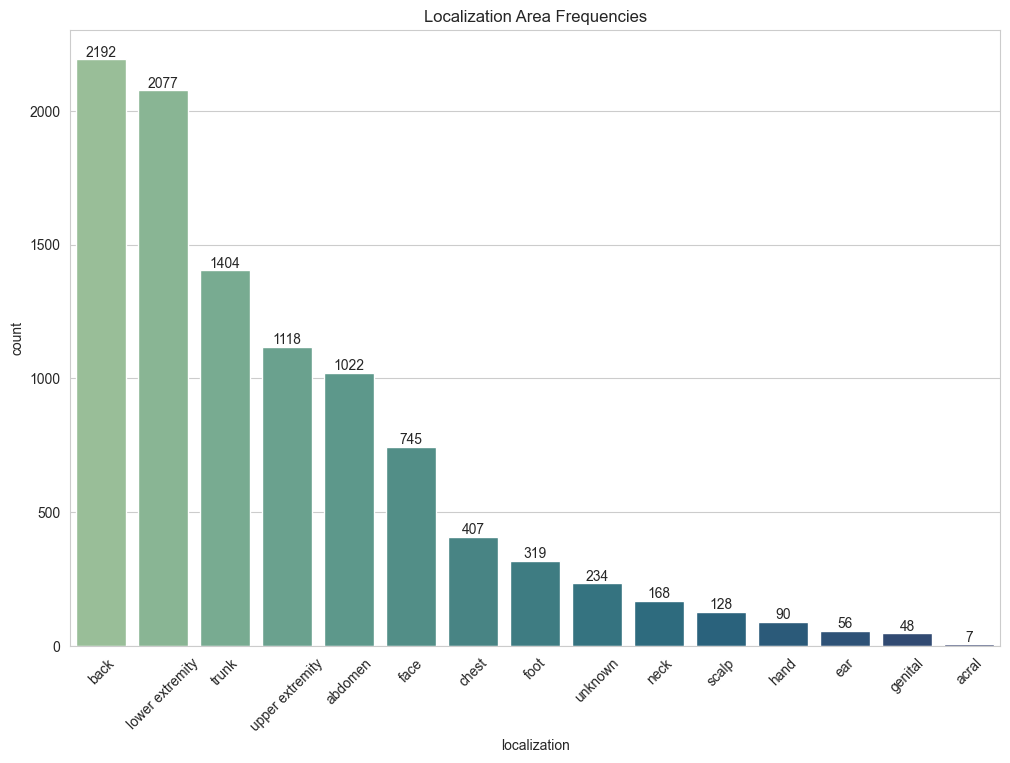

In [15]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization',data=data1, order = data1['localization'].value_counts().index, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()


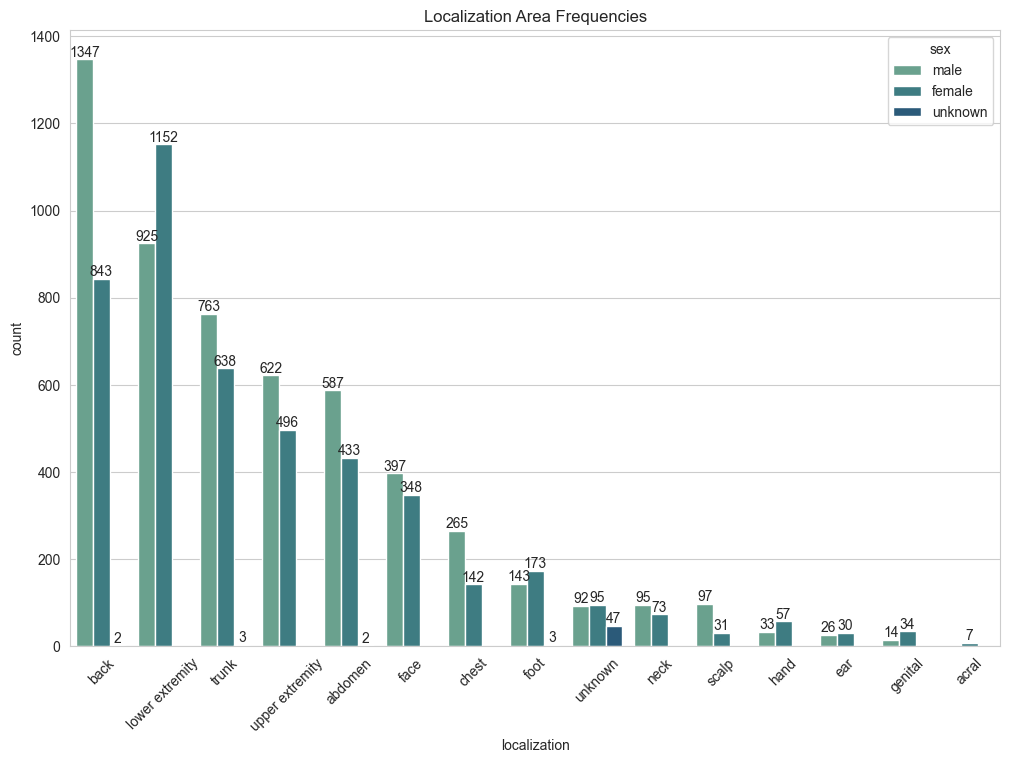

In [16]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization',hue='sex', data=data1, order = data1['localization'].value_counts().index, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()

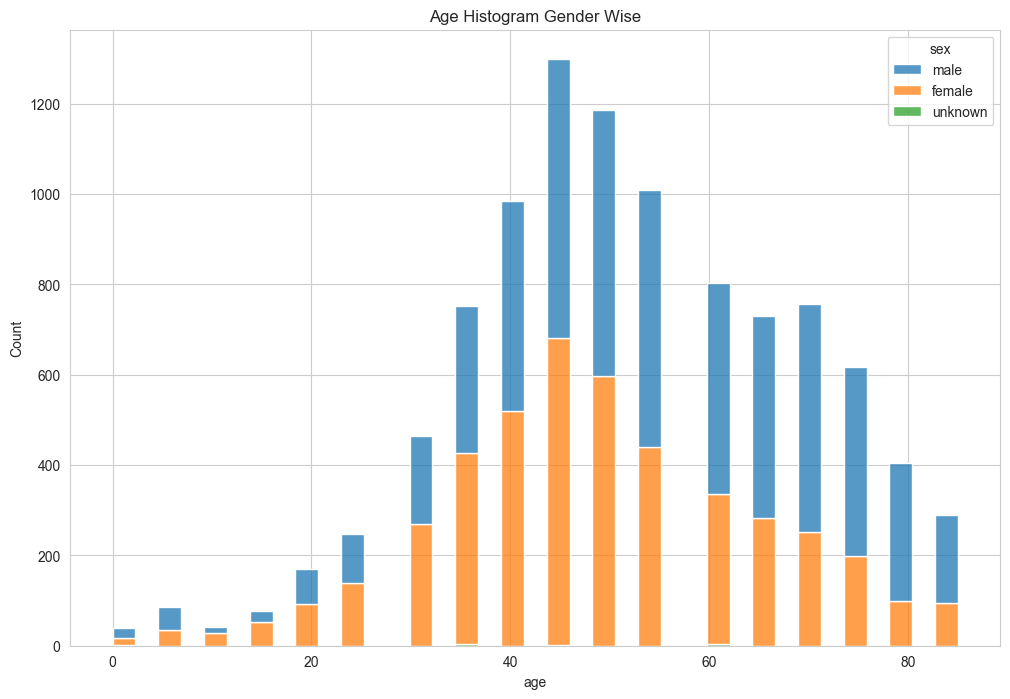

In [17]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=data1, x='age',hue='sex',multiple='stack')
plt.title('Age Histogram Gender Wise')
plt.show()

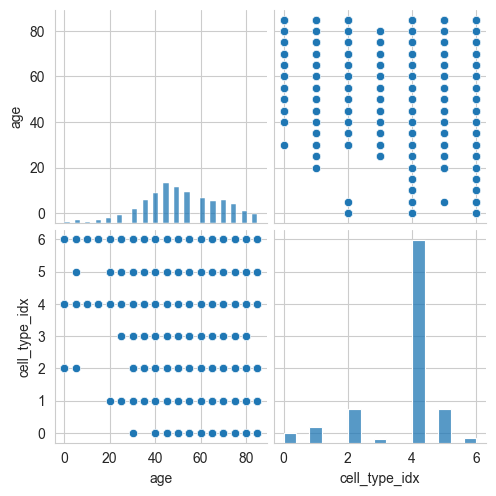

In [18]:
sns.pairplot(data1)

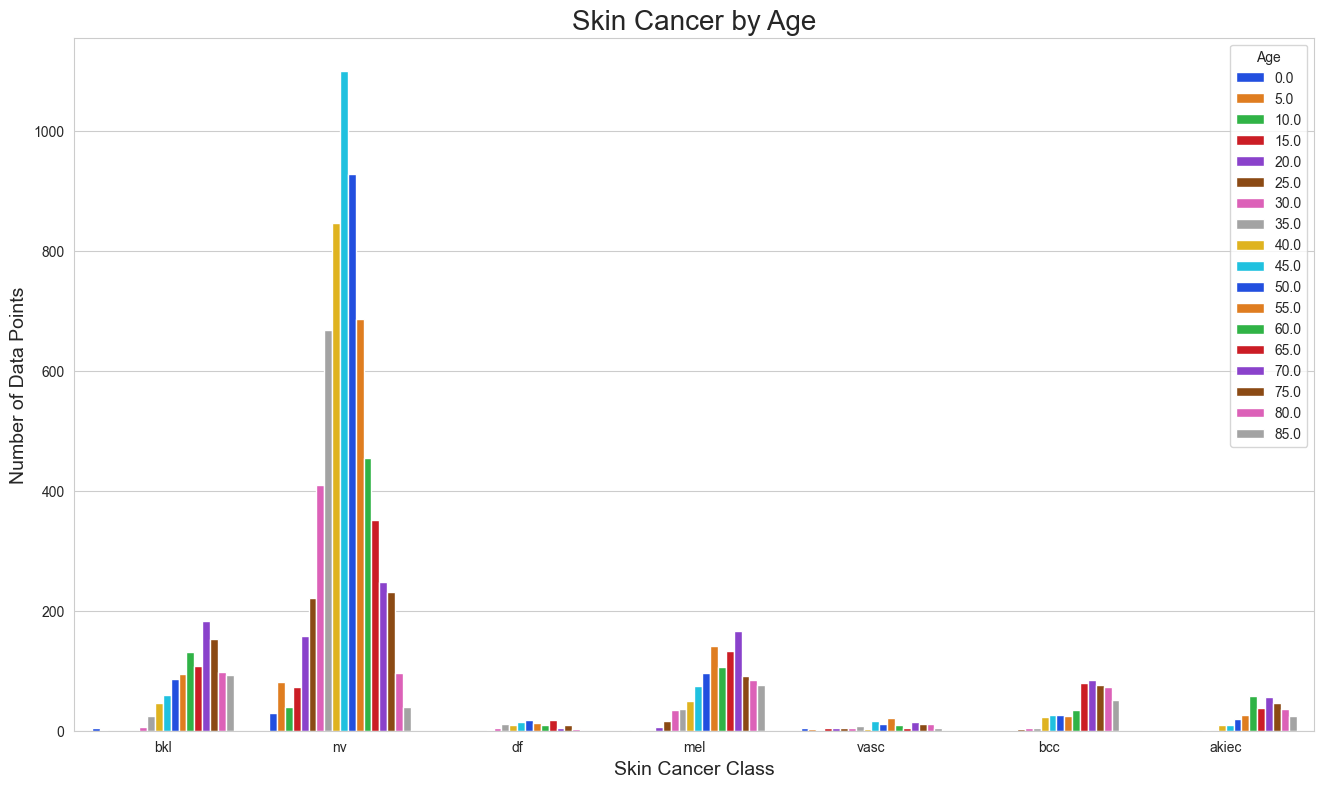

In [19]:
plt.figure(figsize=(16, 9))
sns.countplot(x="dx", hue="age", palette='bright', data=data1)
plt.title('Skin Cancer by Age', fontsize=20)
plt.xlabel('Skin Cancer Class', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.legend(title='Age')
plt.show()

# Displaying original Image

In [20]:
from skimage.io import imread
data1['image'] = data1['path'].map(lambda x: np.asarray(Image.open(x).resize((28,28))))

In [21]:
from skimage.io import imread
data1['image1'] = data1['path'].map(lambda x: np.asarray(Image.open(x).resize((75,100))))

In [22]:
data1.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image,image1
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2,"[[[192, 153, 193], [195, 155, 192], [197, 154,...","[[[191, 154, 196], [191, 155, 197], [191, 149,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2,"[[[27, 16, 32], [69, 49, 76], [122, 93, 126], ...","[[[24, 13, 22], [24, 14, 25], [29, 17, 35], [4..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2,"[[[192, 138, 153], [200, 144, 162], [202, 142,...","[[[187, 129, 139], [192, 135, 150], [197, 143,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2,"[[[40, 21, 31], [95, 61, 73], [143, 102, 118],...","[[[23, 11, 18], [30, 15, 25], [50, 29, 39], [7..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:\Users\Manoj Kuliyal\OneDrive\Projects\Skin_...,benign keratosis-like lesions,2,"[[[159, 114, 140], [194, 144, 173], [215, 162,...","[[[135, 91, 114], [152, 107, 131], [169, 125, ..."


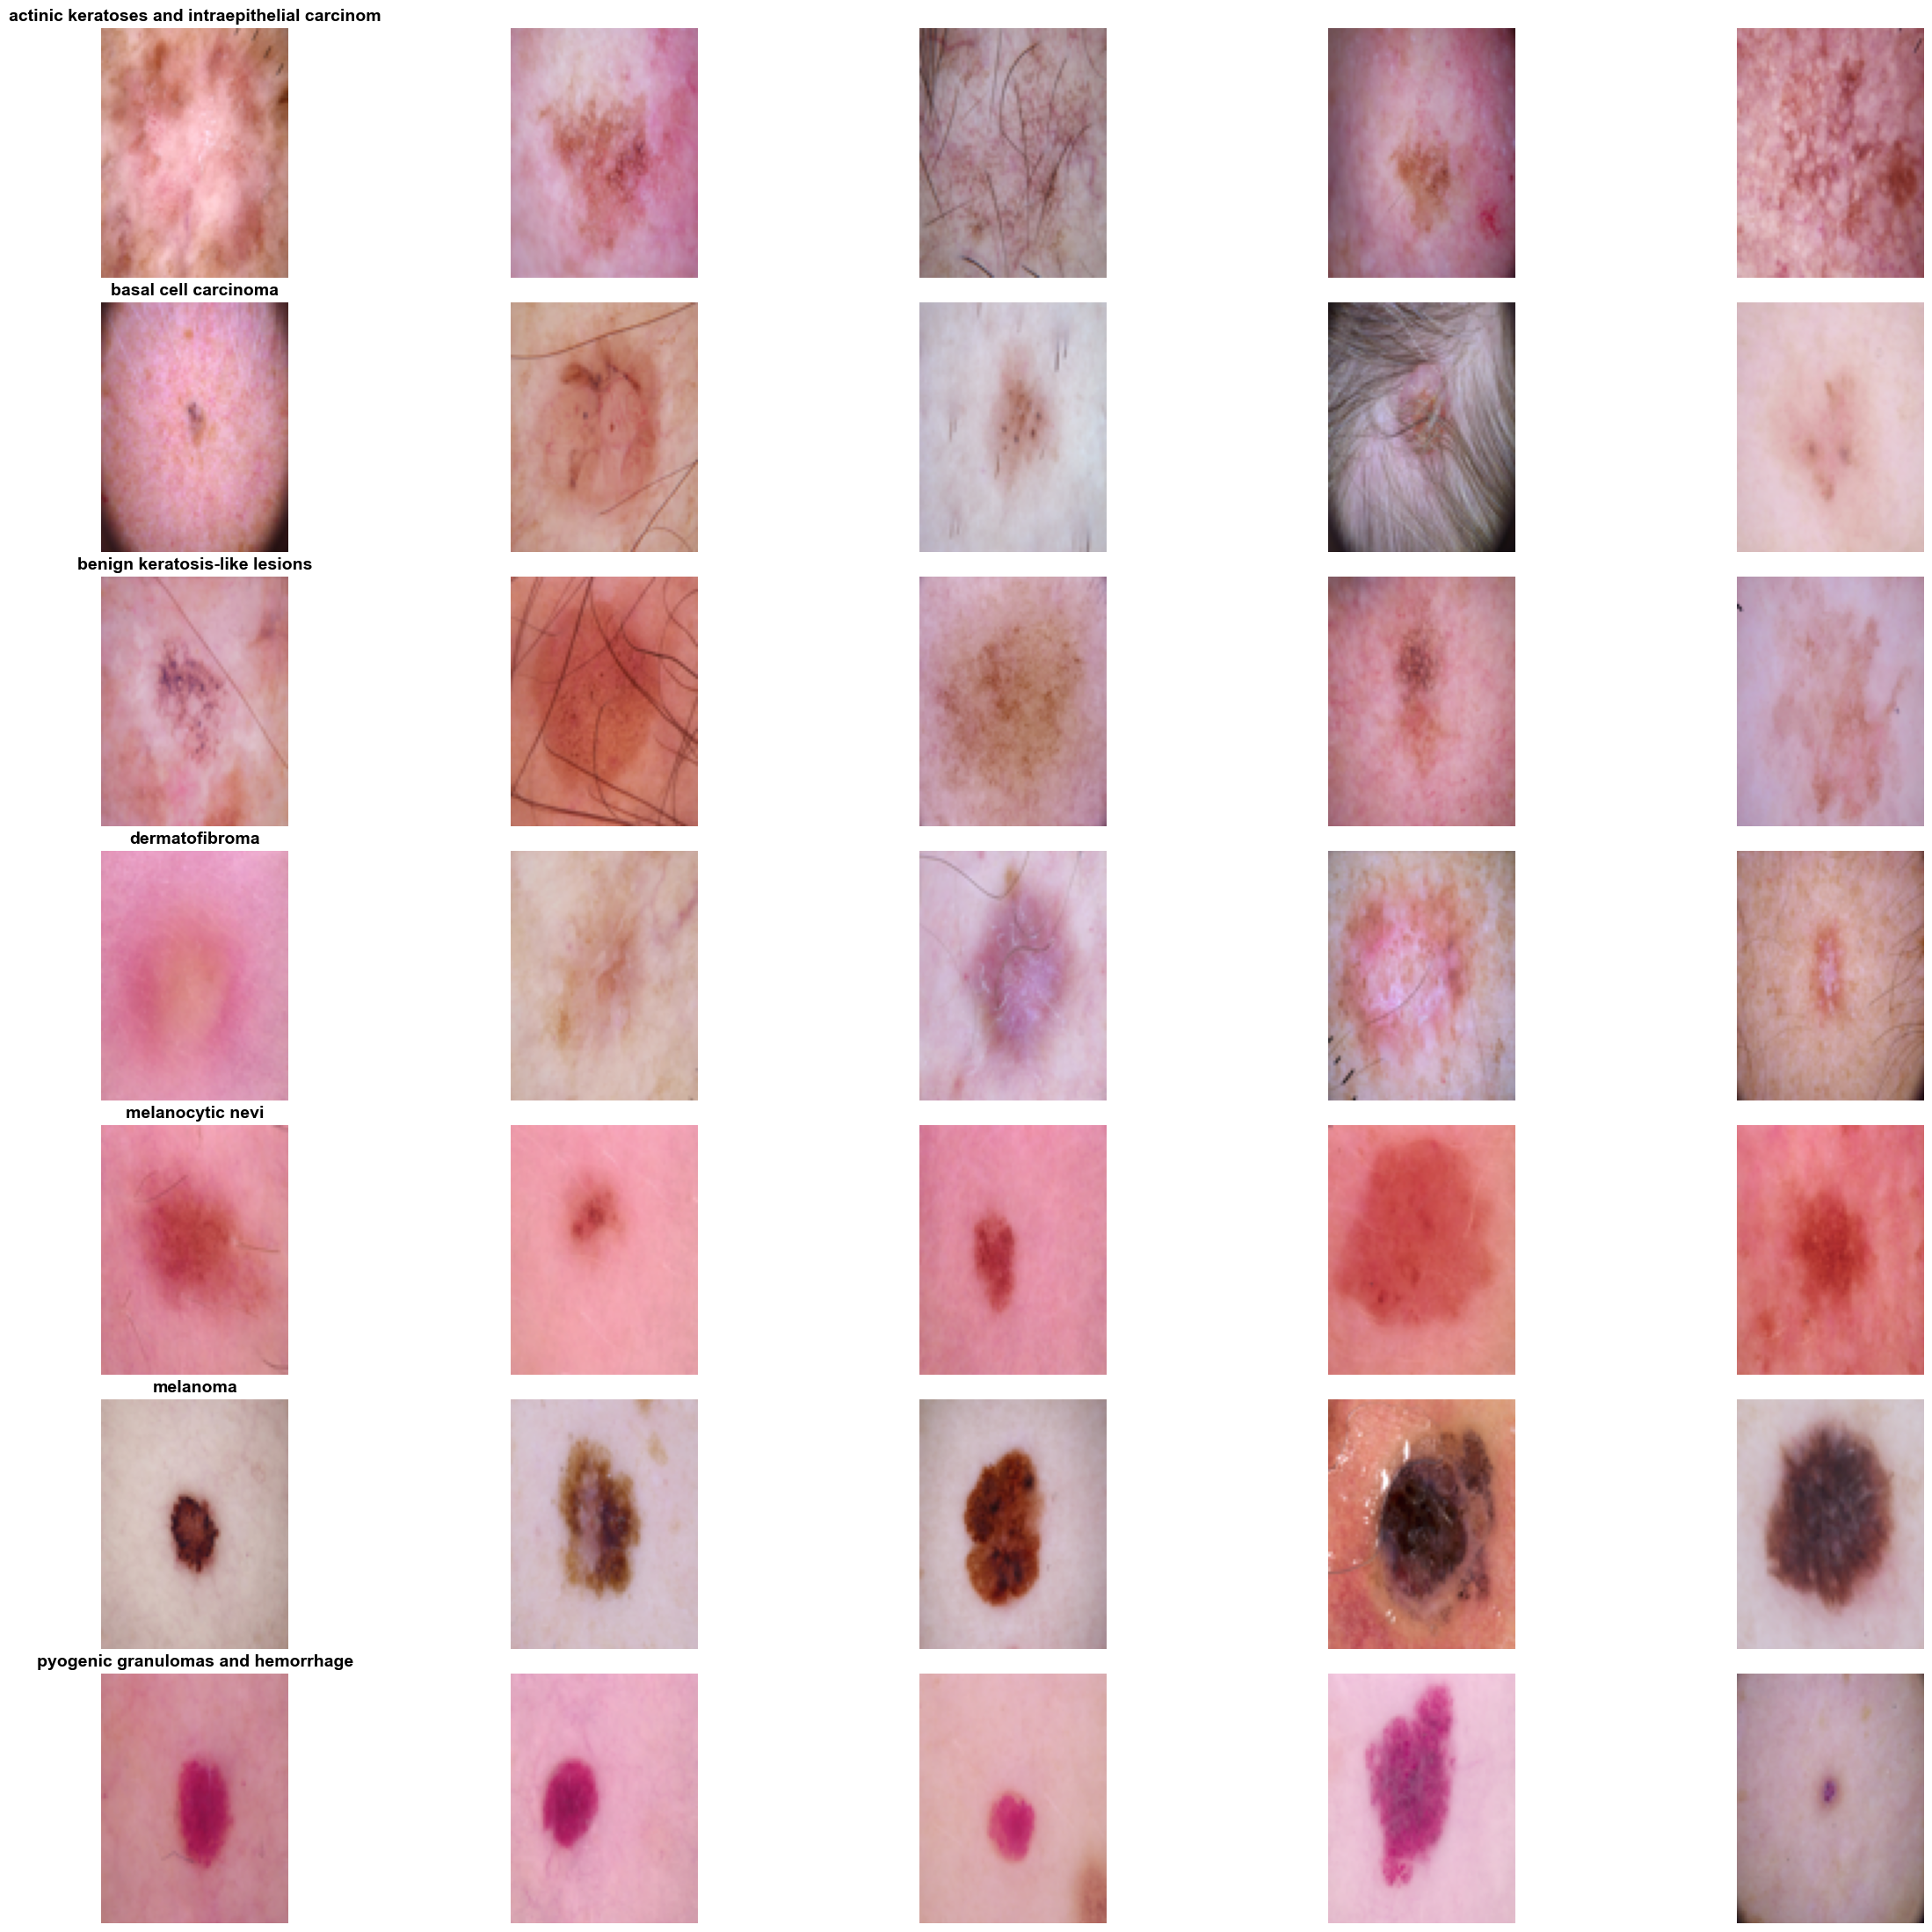

In [92]:
import matplotlib.pyplot as plt

n_samples = 5
fig, axs = plt.subplots(7, n_samples, figsize=(6 * n_samples, 4 * 7), sharex=True, sharey=True)

for row_axs, (cell_type, cell_rows) in zip(axs, data1.groupby('cell_type')):
    title_properties = {'fontsize': 14, 'fontweight': 'bold', 'color': 'black'}
    row_axs[0].set_title(cell_type, fontdict=title_properties)
    sampled_rows = cell_rows.sample(n_samples, random_state=2018)
    
    for ax, (_, row) in zip(row_axs, sampled_rows.iterrows()):
        ax.imshow(row['image1'])
        ax.axis('off')
        
# Reduce the space between subplots
plt.subplots_adjust(wspace=0.001, hspace=0.1)

# Increase font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


## Data Preprocessing

In [150]:
Label = data1["cell_type_idx"]
Data1 = data1.drop(columns=["cell_type_idx"],axis=1)

In [151]:
Label.value_counts()

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: cell_type_idx, dtype: int64

In [152]:
classes={
    0:('akiec','actinic keratoses and intraepithelial carcinom'),
    1:('bcc','basal cell carcinoma'),
    2:('bkl','benign keratosis-like lesions'),
    3:('df','dermatofibroma'),
    4:('nv','melanocytic nevi'),
    5:('vasc','pyogenic granulomas and hemorrhage'),
    6:('mel','melanoma')
}

In [153]:
from sklearn.model_selection import train_test_split
Xtrain, X_test, y_train, y_test = train_test_split(data1, Label, test_size=0.30,random_state=42)

#### Normalizing the data and making the data in the format so that it becomes suitable for machine to learn it helps the data to ensure that the activation functions should get prevented from vanishing gradient which makes back propagation easy

In [154]:
x_train = np.asarray(Xtrain['image'].tolist())
x_test = np.asarray(X_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [155]:
# Let's confirm the number of classes :
no_of_classes = len(np.unique(y_train))
no_of_classes

7

In [156]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] 

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [158]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 3))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 3))

In [159]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[0.0034796 , 0.00186907, 0.00398819],
        [0.0034796 , 0.00195384, 0.00407296],
        [0.00339484, 0.00169954, 0.00390343],
        ...,
        [0.00398819, 0.00195384, 0.00441202],
        [0.0037339 , 0.0020386 , 0.00424249],
        [0.00381866, 0.00178431, 0.00424249]],

       [[0.00331007, 0.00195384, 0.00390343],
        [0.00339484, 0.00195384, 0.00407296],
        [0.00339484, 0.00178431, 0.00398819],
        ...,
        [0.00398819, 0.00169954, 0.00424249],
        [0.00390343, 0.00186907, 0.00424249],
        [0.00398819, 0.00195384, 0.00432725]],

       [[0.0034796 , 0.0020386 , 0.00407296],
        [0.00356437, 0.00237766, 0.00441202],
        [0.00356437, 0.00220813, 0.00424249],
        ...,
        [0.00398819, 0.00169954, 0.00424249],
        [0.00390343, 0.00169954, 0.00415772],
        [0.00398819, 0.00186907, 0.00424249]],

       ...,

       [[0.0037339 , 0.00127572, 0.00381866],
        [0.0037339 , 0.00127572, 0.00381866],
        [0.00381866, 0

# Data Augmentation

In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
AugmentedData=ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')

In [161]:
AugmentedData

In [162]:
AugmentedData.fit(x_train)

# Modelling the Data

## Simple CNN Model

In [168]:
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
def accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [169]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop

In [170]:
model=Sequential()

In [171]:
model.add(Conv2D(64,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(512,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(1024,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(1024,(1,1),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[accuracy])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 27, 27, 64)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 512)       131584    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 512)        0         
 g2D)                                                            
                                                      

In [172]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early=EarlyStopping(monitor='accuracy',patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1, mode='min', min_lr=0.0001)

In [186]:
class_weights={0:1,1:1,2:1,3:1,4:0.5,5:1,6:1}
# total_samples = len(y_train)
# flat_y_train = y_train.astype(int).flatten()
# class_counts = np.bincount(flat_y_train, minlength=7)
# epsilon = 1e-7  # Small epsilon value to avoid division by zero
# max_weight = 10.0  # Set a maximum value for weights
# class_weights = {i: min(max_weight, total_samples / ((class_counts[i] + epsilon) * 7)) for i in range(len(class_counts))}
# class_weights

In [189]:
model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),callbacks=[reduce_lr,early],class_weight=class_weights)

Epoch 1/30
220/220 [==============================] - 90s 409ms/step - loss: 0.4100 - accuracy: 0.9357 - val_loss: 0.6445 - val_accuracy: 0.9082 - lr: 1.0000e-04
Epoch 2/30
220/220 [==============================] - 202s 918ms/step - loss: 0.4036 - accuracy: 0.9331 - val_loss: 0.6636 - val_accuracy: 0.9055 - lr: 1.0000e-04
Epoch 3/30
220/220 [==============================] - 210s 953ms/step - loss: 0.4024 - accuracy: 0.9355 - val_loss: 0.6967 - val_accuracy: 0.8962 - lr: 1.0000e-04
Epoch 4/30
220/220 [==============================] - 204s 927ms/step - loss: 0.3899 - accuracy: 0.9389 - val_loss: 0.6665 - val_accuracy: 0.9018 - lr: 1.0000e-04
Epoch 5/30
220/220 [==============================] - 209s 948ms/step - loss: 0.3863 - accuracy: 0.9398 - val_loss: 0.6717 - val_accuracy: 0.9038 - lr: 1.0000e-04
Epoch 6/30
220/220 [==============================] - 219s 997ms/step - loss: 0.3807 - accuracy: 0.9431 - val_loss: 0.6648 - val_accuracy: 0.9085 - lr: 1.0000e-04
Epoch 7/30
220/220 [===

# Evaluation

<AxesSubplot: >

<Figure size 1500x1000 with 0 Axes>

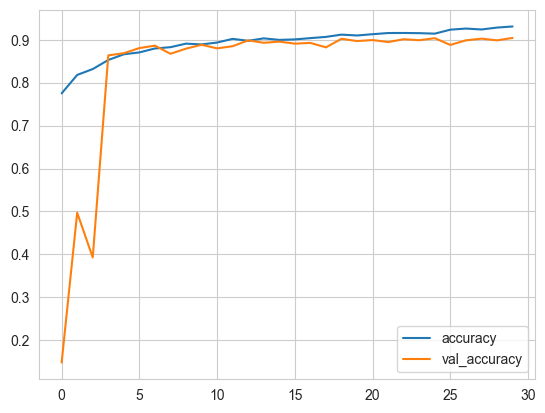

In [44]:
plt.figure(figsize=(15,10))
loss=pd.DataFrame(model.history.history)
loss[['accuracy','val_accuracy']].plot()

<AxesSubplot: >

<Figure size 1500x1000 with 0 Axes>

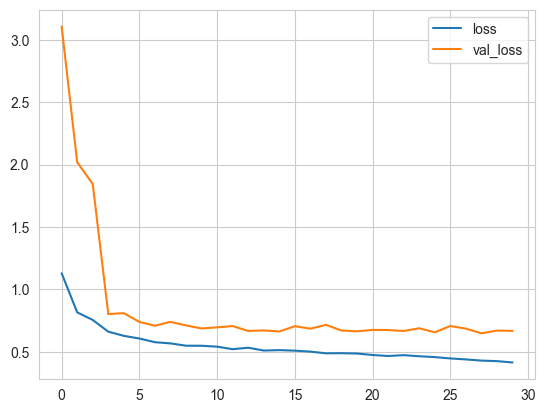

In [45]:
plt.figure(figsize=(15,10))
loss[['loss','val_loss']].plot()

94/94 [==============================] - 6s 53ms/step


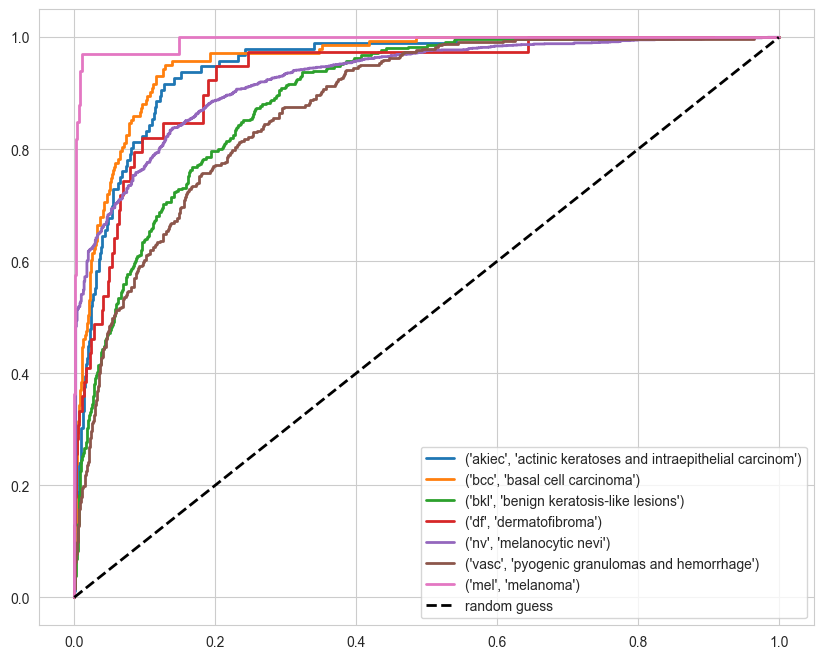

In [46]:
plt.figure(figsize=(10,8))

pred=model.predict(x_test)

from sklearn.metrics import roc_curve,auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(7):
    plt.plot(fpr[i],tpr[i],label=classes[i],linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2,label='random guess')
plt.legend(loc="lower right")

In [47]:
score=model.evaluate(x_test,y_test)
print(f"the Model Accuracy is {score[1]}")

94/94 [==============================] - 5s 49ms/step - loss: 0.6667 - accuracy: 0.9042
the Model Accuracy is 0.9041597247123718


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

predictions = np.argmax(model.predict(x_test), axis=1)


check = []
for i in range(len(y_test)):
    for j in range(7):
        if y_test[i][j] == 1:
            check.append(j)
check = np.asarray(check)

print(classification_report(check, predictions))


94/94 [==============================] - 4s 44ms/step
              precision    recall  f1-score   support

           0       0.46      0.45      0.45        96
           1       0.52      0.61      0.56       143
           2       0.52      0.55      0.54       350
           3       0.80      0.10      0.18        39
           4       0.89      0.90      0.89      1997
           5       0.54      0.49      0.52       347
           6       0.76      0.67      0.71        33

    accuracy                           0.77      3005
   macro avg       0.64      0.54      0.55      3005
weighted avg       0.77      0.77      0.77      3005



## Plot Confusion matrix

94/94 [==============================] - 4s 44ms/step


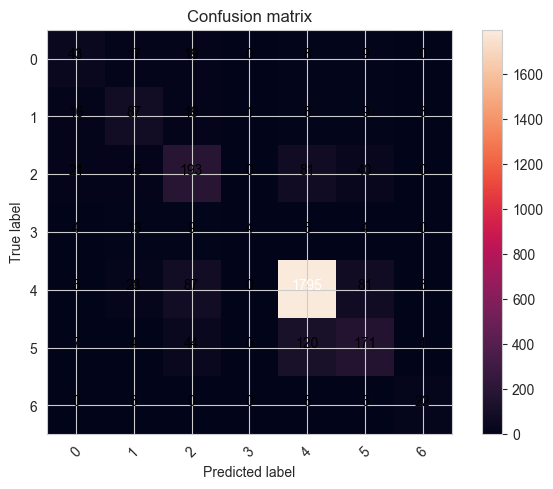

In [49]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [50]:
# from keras.applications import VGG16
# from keras.models import Model

# # Example of transfer learning with VGG16
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Add your classifier on top
# x = Flatten()(base_model.output)
# x = Dense(256, activation='relu')(x)
# # predictions = Dense(7, activation='softmax')(x)

# # # Create the final model
# # model = Model(inputs=base_model.input, outputs=predictions)


In [51]:
model.save('C:\\Users\\Manoj Kuliyal\\OneDrive\\Projects\\Skin_Cancer_Classification\\model\\Classifier.h5')

2

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               6422784   
                                                                 
 dense_11 (Dense)            (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________
